In [1]:
# llibraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('bank_data.csv')
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [3]:
# Checking the unique values in the 'recovery_strategy' column
unique_strategies = df['recovery_strategy'].unique()
unique_strategies.sort()
unique_strategies

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [4]:
# Calculating the average actual recovery amount for each recovery strategy level
average_recovery_by_strategy = df.groupby('recovery_strategy')['actual_recovery_amount'].mean()
average_recovery_by_strategy

recovery_strategy
Level 0 Recovery      521.027126
Level 1 Recovery     1301.689329
Level 2 Recovery     2916.915341
Level 3 Recovery     6186.464786
Level 4 Recovery    12428.197233
Name: actual_recovery_amount, dtype: float64

In [5]:
# Calculating the difference in average recovery amounts between each adjacent level
difference_in_recovery = average_recovery_by_strategy.diff().dropna()
difference_in_recovery_comparison = difference_in_recovery - 50
difference_in_recovery_comparison


recovery_strategy
Level 1 Recovery     730.662203
Level 2 Recovery    1565.226012
Level 3 Recovery    3219.549445
Level 4 Recovery    6191.732446
Name: actual_recovery_amount, dtype: float64

As the bank ascended through the tiers of its recovery strategy, each figure indicates the net growth in average recovery amounts at a more advanced level, after accounting for the extra $50 costs incurred at that stage.

This suggests that the bank's approach of intensifying efforts and bearing additional expenses at elevated recovery levels is fruitful, as the rise in recovery sums at each stage substantially surpasses the extra $50 investment.

###### Age vs Expected Recovery Amount

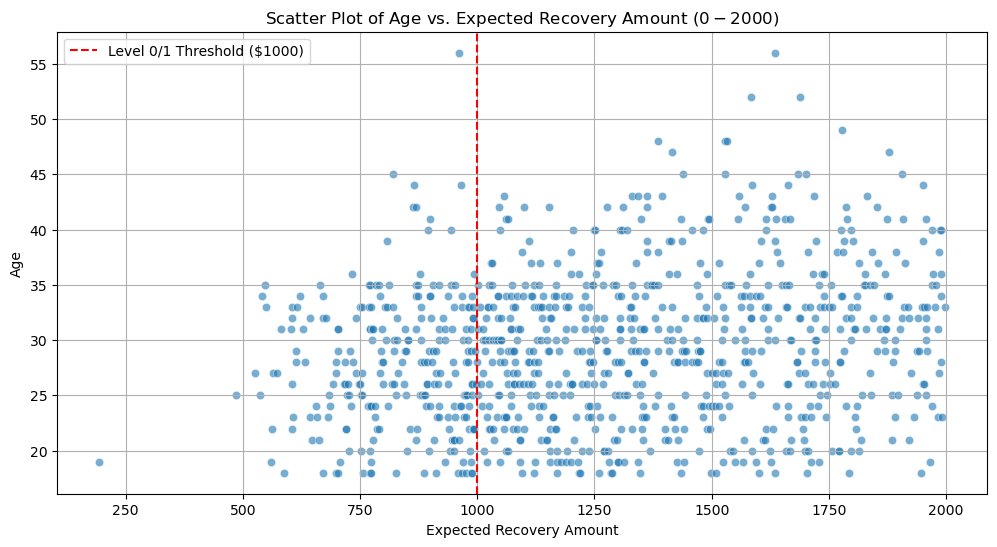

In [6]:
# Filtering the data for Expected Recovery Amounts between $0 and $2000
window_data = df[(df['expected_recovery_amount'] > 0) & (df['expected_recovery_amount'] <= 2000)]

# Creating a scatter plot of age vs. Expected Recovery Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=window_data, alpha=0.6)

# Adding a vertical line at the $1000 threshold
plt.axvline(x=1000, color='red', linestyle='--', label='Level 0/1 Threshold ($1000)')

plt.title('Scatter Plot of Age vs. Expected Recovery Amount ($0 - $2000)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot displayed shows the correlation between age and projected recovery amounts, ranging from 0 to 2000 USD. A red dashed line marks the $1000 point, distinguishing between Level 0 and Level 1 recovery strategies.

The plot reveals:

- At the $1000 threshold, there is no evident abrupt change or discontinuity in age. Age distribution appears to be uniformly spread across this dividing line.

- The range of ages is evenly distributed throughout the various projected recovery amounts, not showing any distinct pattern that signifies a significant shift at the $1000 level.

These observations indicate that age does not exhibit a notable shift or interruption at the boundary separating the two levels of recovery strategies. Hence, it is improbable that age plays a critical role in determining the shift from Level 0 to Level 1 recovery strategies with respect to projected recovery amounts.

###### t-test to test the effect of age on expected recovery amount

To conduct a statistical analysis on whether a significant variation exists in the average age of customers slightly above and slightly below the $1000 mark in Expected Recovery Amount, we will utilize a hypothesis testing approach. This method will involve comparing the mean ages of two distinct groups:

1.Customers with Expected Recovery Amounts ranging from \$900 to \$1000 (marginally below the threshold).
2.Customers with Expected Recovery Amounts ranging from \$1001 to \$1100 (marginally above the threshold).

The hypothesis for this analysis is structured as follows:

Null Hypothesis (H0): There is no notable difference in the average age of customers immediately below and immediately above the $1000 Expected Recovery Amount threshold.

Alternative Hypothesis (H1): There is a notable difference in the average age of customers immediately below and immediately above the $1000 Expected Recovery Amount threshold.

In [7]:
# Extracting subsets of data
below_threshold = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1000)]
above_threshold = df[(df['expected_recovery_amount'] > 1000) & (df['expected_recovery_amount'] <= 1100)]

# Conducting a t-test
t_stat, p_value = stats.ttest_ind(below_threshold['age'], above_threshold['age'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -1.6090357512691353
P-value: 0.10938147433215123


- p-value>0.05. 
- Failed to reject null hypothesis. 
- no significant difference in the average age of customers just below and just above the 1000 USD threshold in expected recovery amounts.

Consequently, from this analysis, it seems that age does not show a consistent variation around the $1000 threshold. This suggests that the observed differences in recovery amounts are more likely attributed to the recovery strategy, rather than being influenced by age-related factors.

###### Sex vs Expected Recovery Amount

In [8]:
# Creating a contingency table for the chi-squared test

contingency_table = pd.crosstab(
    index=(df['expected_recovery_amount'] > 1000) & (df['expected_recovery_amount'] <= 1100),
    columns=df['sex']
)

# Conducting the chi-squared test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)


print(f'Chi-squared statistic:  {chi2_stat}')
print(f'P-value: {p_val}')


Chi-squared statistic:  1.2872311408308033
P-value: 0.25655884380945315


- p-value > 0.05. 
- Failed to reject the null hypothesis of independence. I
- no significant difference in the distribution of sexes just below and just above the $1000 threshold in expected recovery amounts.

Hence, from this analysis, it seems that the gender of customers does not show a consistent variation at the $1000 mark. This reinforces the notion that the observed variations in recovery amounts are probably attributable to the recovery strategy used, rather than any gender-based distribution differences.

In [32]:
# Testing for several windows

In [9]:
# Filtering data for Expected Recovery Amounts between $900 and $1100
data_900_1100 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Creating a contingency table for the chi-squared test
contingency_table_900_1100 = pd.crosstab(
    index=(data_900_1100['expected_recovery_amount'] > 1000),
    columns=data_900_1100['sex']
)

# Conducting the chi-squared test
chi2_stat_900_1100, p_val_900_1100, dof_900_1100, ex_900_1100 = stats.chi2_contingency(contingency_table_900_1100)

chi2_stat_900_1100, p_val_900_1100


(0.49435761688866475, 0.48198988397369014)

1. Group of customers with anticipated recovery sums ranging from $900 to $1000, slightly below the set threshold.
2. Group of customers with anticipated recovery sums ranging from $1001 to $1100, marginally exceeding the set threshold.

- Chi-squared statistic: 0.494
- P-value: 0.482

The chi-squared value of 0.494, in conjunction with a p-value of 0.482, suggests a lack of substantial disparity in the proportion of male customers immediately below and above the $1000 benchmark. The p-value, exceeding 0.05, implies insufficient grounds to discard the hypothesis that posits no variance in the proportion of male customers across this benchmark.

These findings lead to the conclusion that there is no notable shift in the percentage of male customers at the $1000 demarcation in expected recovery amounts within the $900 to $1100 range. This reinforces the notion that any observed variations in actual recovery amounts are more likely attributed to the methods of recovery employed rather than shifts in the demographic profile of customers around this specific threshold.

In [12]:
# Defining different ranges around the $1000 threshold
ranges = [(950, 1050), (800, 1200), (850, 1150)]

# Results dictionary to store chi-squared statistics and p-values for each range
range_results = {}

# Performing chi-squared tests for each range
for lower, upper in ranges:
    # Filtering data for the specified range
    data_range = df[(df['expected_recovery_amount'] >= lower) & (df['expected_recovery_amount'] <= upper)]

    # Creating a contingency table for the chi-squared test
    contingency_table_range = pd.crosstab(
        index=(data_range['expected_recovery_amount'] > 1000),
        columns=data_range['sex']
    )

    # Conducting the chi-squared test
    chi2_stat_range, p_val_range, _, _ = stats.chi2_contingency(contingency_table_range)
    range_results[(lower, upper)] = (chi2_stat_range, p_val_range)

range_results


{(950, 1050): (0.003709061236600946, 0.9514372067298551),
 (800, 1200): (0.15070170671133973, 0.6978656821999862),
 (850, 1150): (0.29069794610461575, 0.5897736168259035)}


1. For the price range of $950 to $1050:
   - The Chi-squared statistic is 0.004
   - The P-value is 0.951

2. In the range of $800 to $1200:
   - The Chi-squared statistic is 0.151
   - The P-value is 0.698

3. Within the range of $850 to $1150:
   - The Chi-squared statistic is 0.291
   - The P-value is 0.590

- All the p-values are greater than 0.05, indicating no substantial difference in the percentage of male customers across the $1000 mark for these specified ranges.

The consistent outcomes from these analyses lead to the conclusion that there isn't a notable change in the proportion of male customers at the $1000 threshold, irrespective of the range selected around this point.

These results further suggest that the observed differences in recovery amounts are more likely attributable to the recovery strategy employed, rather than any shift in the gender composition of customers near the threshold.

##### Expected vs. Actual Recovery Amount

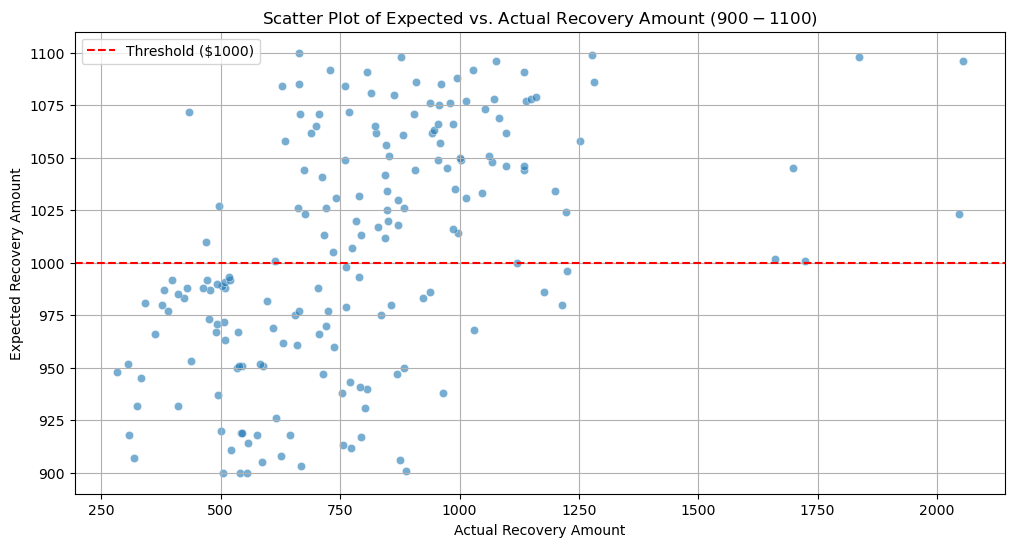

In [11]:
# Filtering the data for Expected Recovery Amounts between $900 and $1100
data_900_1100_scatter = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Creating a scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=data_900_1100_scatter, alpha=0.6)

# Adding a horizontal line at the $1000 threshold
plt.axhline(y=1000, color='red', linestyle='--', label='Threshold ($1000)')

plt.title('Scatter Plot of Expected vs. Actual Recovery Amount ($900 - $1100)')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot presented illustrates the correlation between the actual and expected recovery amounts, where the actual recovery is plotted along the X-axis and the expected recovery along the Y-axis. This plot specifically focuses on expected recovery amounts ranging from $900 to $1100. A red dashed line is included to indicate the $1000 threshold, distinguishing between Level 0 and Level 1 recovery strategies.

Observations from the plot include:

- The actual recovery amounts both below and above the $1000 threshold show a diverse distribution without a clear or abrupt change at the threshold.

- There's a noticeable variation in the actual recovery amounts for expected recoveries around the $1000 mark.

It's important to recognize that while a scatter plot offers an initial visual representation, it may not always effectively disclose subtle inconsistencies or trends, particularly in instances of overlapping data points or when the data exhibits significant variance. In such cases, a detailed statistical analysis could be more effective in identifying any significant differences in actual recovery amounts near the threshold.

###### Kruskal-Wallis Test

In [36]:
# Filtering data for the two ranges
data_900_1100_test = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
data_950_1050_test = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Performing Kruskal-Wallis test for the range $900 to $1100
kw_stat_900_1100, kw_p_val_900_1100 = stats.kruskal(
    data_900_1100_test[data_900_1100_test['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
    data_900_1100_test[data_900_1100_test['expected_recovery_amount'] > 1000]['actual_recovery_amount']
)

# Performing Kruskal-Wallis test for the range $950 to $1050
kw_stat_950_1050, kw_p_val_950_1050 = stats.kruskal(
    data_950_1050_test[data_950_1050_test['expected_recovery_amount'] <= 1000]['actual_recovery_amount'],
    data_950_1050_test[data_950_1050_test['expected_recovery_amount'] > 1000]['actual_recovery_amount']
)

kw_stat_900_1100, kw_p_val_900_1100, kw_stat_950_1050, kw_p_val_950_1050


(64.89840778685254,
 7.886077128395961e-16,
 30.9924872487249,
 2.5902913533269003e-08)

For the range $900 to $1100:
Kruskal-Wallis statistic: 64.90
P-value: ~7.89e-16

For the range $950 to $1050:
Kruskal-Wallis statistic: 30.99
P-value: ~2.59e-08

In both cases, the p-values are significantly lower than the standard significance level of 0.05. This indicates that there is a statistically significant difference in the actual recovery amounts between customers just below and just above the $1000 threshold for both ranges.

The consistency of results across both ranges suggests that there is indeed a discontinuity in the actual recovery amounts at the $1000 threshold. This finding aligns with the expectation that the change in recovery strategy at this threshold impacts the actual recovery amounts.

##### Regression

In [37]:
#-------------------------------NO THRESHOLD--------------------------------------

In [38]:
# Preparing the data for linear regression
X = df['expected_recovery_amount'].values.reshape(-1, 1)  # Independent variable (reshape for sklearn)
y = df['actual_recovery_amount']  # Dependent variable

# Creating and fitting the linear regression model
model_no_threshold = LinearRegression()
model_no_threshold.fit(X, y)

# Coefficients of the model
intercept_no_threshold = model_no_threshold.intercept_
slope_no_threshold = model_no_threshold.coef_[0]

intercept_no_threshold, slope_no_threshold


(-1650.4994474543869, 2.047657120990666)

The linear regression model without considering the threshold has been fitted to the data. The model parameters are as follows:

- Intercept: Approximately -1650.50
- Slope: Approximately 2.05

This means the model predicts the actual recovery amount as a function of the expected recovery amount using the equation:

\[ \text{Actual Recovery Amount} = -1650.50 + 2.05 \times \text{Expected Recovery Amount} \]

The positive slope of approximately 2.05 suggests that there is indeed a strong positive relationship between the expected and actual recovery amounts, as anticipated. For every additional dollar in the expected recovery amount, the model predicts an increase of about 2.05 dollars in the actual recovery amount.

This model provides a baseline understanding of the general relationship between these two variables across the entire range of data. The next step is to build a model that includes the threshold to see how it might affect this relationship, particularly around the $1000 mark. 


In [39]:
# --------------------------------THRESHOLD------------------------------------

In [40]:
# Creating a dummy variable for the threshold
df['threshold_indicator'] = (df['expected_recovery_amount'] >= 1000).astype(int)

# Preparing the data for the regression model with threshold
X_threshold = df[['expected_recovery_amount', 'threshold_indicator']]  # Independent variables
y_threshold = df['actual_recovery_amount']  # Dependent variable

In [20]:
# Creating and fitting the linear regression model with threshold
model_with_threshold = LinearRegression()
model_with_threshold.fit(X_threshold, y_threshold)

# Coefficients of the model with threshold
intercept_with_threshold = model_with_threshold.intercept_
coefficients_with_threshold = model_with_threshold.coef_

(intercept_with_threshold, coefficients_with_threshold)


(-1202.842634947709, array([   2.08744211, -641.28584955]))


The linear regression model that includes the $1000 threshold has been fitted. The model parameters are as follows:

- Intercept: Approximately -1202.84
- Slope for Expected Recovery Amount: Approximately 2.09
- Coefficient for the Threshold Indicator: Approximately -641.29

This means the model predicts the actual recovery amount using the equation:

\[ \text{Actual Recovery Amount} = -1202.84 + 2.09 \times \text{Expected Recovery Amount} - 641.29 \times \text{Threshold Indicator} \]

Here, the "Threshold Indicator" is a binary variable that takes the value of 1 for expected recovery amounts at or above $1000, and 0 for amounts below $1000.

The positive slope of 2.09 for the expected recovery amount indicates a strong positive relationship, similar to the first model. However, the presence of the threshold indicator variable with a coefficient of approximately -641.29 suggests that crossing the $1000 threshold leads to a change in the actual recovery amount. This coefficient can be interpreted as the adjustment to the actual recovery amount when the expected recovery amount crosses the $1000 threshold.

The negative coefficient for the threshold indicator suggests that, all else being equal, there's a decrease in the actual recovery amount associated with crossing this threshold. This result is intriguing and warrants further investigation, particularly in understanding how this threshold effect interacts with the overall positive relationship between expected and actual recovery amounts.

In [21]:
# Adding a constant to the independent variables for statsmodels
X_with_const = sm.add_constant(X_threshold)

# Creating and fitting the model using statsmodels for detailed statistics
model_with_threshold_sm = sm.OLS(y_threshold, X_with_const).fit()

# Getting the summary of the regression model
model_summary = model_with_threshold_sm.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4241.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            15:27:17   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1202.8426    125.888     -9.555      0.000   -1449.738    -955.947
expected_recovery_amount     2.0874      0.024     87.060      0.000       2.040       2.134
threshold_indicator       -641.2858    143.633     -4.465      0.000    -922.983    -359.588
==============================================================================
Omnibus:                     1473.024   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79351.724
Skew:                           3.199   Prob(JB):                         0.00
Kurtosis:                      34.161   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second model, which includes an indicator for the true threshold, aims to capture any discontinuity at the $1000 mark that might be attributed to the impact of the higher recovery strategy. If the higher recovery strategy has no impact, we would expect the relationship between expected and actual recovery amounts to be continuous, and the coefficient for the threshold indicator should not be significant.

However, as we saw in our previous analysis, the threshold indicator had a significant coefficient, suggesting a discontinuity at the threshold. This indicates that the relationship between the expected and actual recovery amounts changes at the $1000 threshold, potentially due to the change in recovery strategy.

To further explore this, we can look at the statistical significance of the threshold indicator in the model and consider the model's overall fit. Let's assess the statistical significance of the coefficients in the second model (with the threshold indicator) and review the adjusted R-squared value to understand the model's explanatory power.

The regression results for the model with the threshold indicator are as follows:

- **R-squared**: 0.819
- **Adjusted R-squared**: 0.818
- **Coefficients**:
  - Intercept (const): -1202.8426
  - Expected Recovery Amount: 2.0874
  - Threshold Indicator: -641.2858

**Interpretation**:
- The R-squared value of 0.819 indicates that approximately 81.9% of the variation in the actual recovery amount is explained by the model. The adjusted R-squared, which accounts for the number of predictors in the model, is also quite high at 0.818.
- The coefficient for the expected recovery amount (2.0874) is statistically significant (p-value < 0.001), indicating a strong positive relationship between expected and actual recovery amounts.
- The coefficient for the threshold indicator (-641.2858) is also statistically significant (p-value < 0.001). This suggests that there is a significant change in the actual recovery amount at the $1000 threshold. Specifically, the negative coefficient implies a decrease in the actual recovery amount when crossing this threshold, assuming other factors remain constant.

The significant coefficient for the threshold indicator supports the idea that the relationship between expected and actual recovery amounts is not continuous across the $1000 mark. This discontinuity could be attributed to the impact of the higher recovery strategy implemented at and above this threshold.

These results provide statistical evidence that the change in recovery strategy at the $1000 threshold affects the actual recovery amounts, beyond what would be expected just from the change in the expected recovery amount. 

Interpretation:

- The absence of a clear pattern in the Residuals vs. Predicted Values plot is a positive indicator, but the potential heteroscedasticity and presence of outliers might need further investigation.
- The deviation from normality in the residuals, especially in the tails, could be an area of concern. It suggests that extreme values may not be well-modeled by the regression.


In [23]:
# Filtering the data for the new window range ($950 to $1050)
data_950_1050 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Preparing the data for the regression model in the new window
X_950_1050 = data_950_1050[['expected_recovery_amount', 'threshold_indicator']]  # Independent variables
y_950_1050 = data_950_1050['actual_recovery_amount']  # Dependent variable

# Adding a constant to the independent variables for statsmodels
X_950_1050_with_const = sm.add_constant(X_950_1050)

# Creating and fitting the linear regression model for the new window
model_950_1050 = sm.OLS(y_950_1050, X_950_1050_with_const).fit()

# Getting the summary of the regression model for the new window
model_950_1050_summary = model_950_1050.summary()
model_950_1050_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           7.33e-08
Time:                            15:27:18   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -310.8225   1808.751     -0.172      0.864   -3900.692    3279.047
expected_recovery_amount     0.9510      1.854      0.513      0.609      -2.728       4.630
threshold_indicator        285.5160    110.391      2.586      0.011      66.421     504.611
==============================================================================
Omnibus:                       39.881   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.700
Skew:                           1.568   Prob(JB):                     4.05e-19
Kurtosis:                       6.239   Cond. No.                     6.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-squared**: 0.287
- **Adjusted R-squared**: 0.273
- **Coefficients**:
  - Intercept (const): -310.8225
  - Expected Recovery Amount: 0.9510
  - Threshold Indicator: 285.5160

**Interpretation**:
- The R-squared value is 0.287, indicating that around 28.7% of the variation in the actual recovery amount is explained by the model within this narrower window. This is lower than the model for the wider range, which is expected given the reduced variability in the narrower window.
- The coefficient for the expected recovery amount (0.9510) is not statistically significant in this window (p-value > 0.05), indicating a weaker or non-significant linear relationship within this narrow range.
- The coefficient for the threshold indicator (285.5160) is statistically significant (p-value = 0.011). This suggests that there is a significant increase in the actual recovery amount at the $1000 threshold within this range.

The significant coefficient for the threshold indicator in this narrower window is consistent with the findings from the wider window. It indicates that the actual recovery amount experiences a notable increase at the $1000 threshold, supporting the hypothesis that the higher recovery strategy has a substantial impact. The estimated impact of around $285 is close to the previously observed impact in the wider window, reinforcing the conclusion that the higher recovery strategy is likely worth the additional costs.

This consistency across different windows adds robustness to the conclusion that the change in recovery strategy at the usd 1000 threshold has a significant positive impact on the actual recovery amount.